<a href="https://colab.research.google.com/github/FedeSchmidt/IA_2020/blob/main/IA_aprendizaje_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Ejemplo de Aprendizaje Automático - Inteligencia Artificial - 2020**

En este notebook vamos a ver un caso de pruebas simple, un problema de clasificación que podremos resolver mediante un Árbol de Decisión y Redes Neuronales Artificiales.

In [1]:
# Descargamos el archivo de datos. En el panel de la izquierda (en Archivos) debe aparecer un archivo denominado iris.csv
!wget https://www.dropbox.com/s/7ct7yv35jk91wgo/iris.csv
!wget https://www.dropbox.com/s/9xliwor8bvu5bue/iris3.jpg

--2020-11-05 00:59:17--  https://www.dropbox.com/s/7ct7yv35jk91wgo/iris.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.9.1, 2620:100:601d:1::a27d:501
Connecting to www.dropbox.com (www.dropbox.com)|162.125.9.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/7ct7yv35jk91wgo/iris.csv [following]
--2020-11-05 00:59:17--  https://www.dropbox.com/s/raw/7ct7yv35jk91wgo/iris.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc1696d8d01b116f60fe4c9f7948.dl.dropboxusercontent.com/cd/0/inline/BCk0pTFTXhyxBO0j62tGfchcKaCbetmrITjrWVF0JQexZG7Y9uxgQuWyOWGh9z4xmHAtQ0pYOcOKsi91n26CZUZjRABdG93dM7X8YCT2gjijFQNWp5OpBh3RpBgxr1cEmec/file# [following]
--2020-11-05 00:59:18--  https://uc1696d8d01b116f60fe4c9f7948.dl.dropboxusercontent.com/cd/0/inline/BCk0pTFTXhyxBO0j62tGfchcKaCbetmrITjrWVF0JQexZG7Y9uxgQuWyOWGh9z4xmHAtQ0pYOcOKsi91n26CZUZjRABdG93dM7X8YCT2gjijFQNWp5OpBh3RpBgxr1

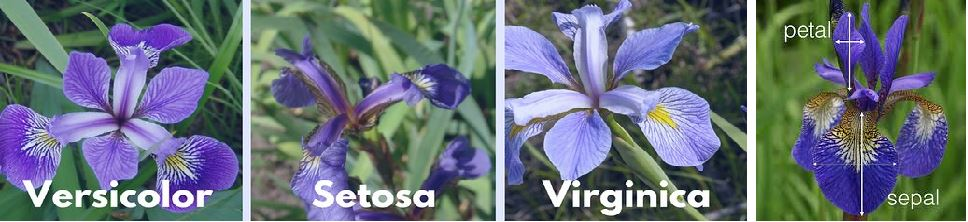

In [2]:
from IPython.display import Image
Image('./iris3.jpg')

Importamos las bibliotecas y módulos necesarios. Usaremos distintas librerías que nos brindan facilidades para todos los pasos que debemos realizar. Por ejemplo:
* Pandas: manejo de los datos;
* Numpy: operaciones algebraicas;
* scikit-learn: biblioteca de Machine Learning para Python;
* Tensorflow, Keras: biblotecas de Machine Learning, útiles para construir redes neuronales artificiales;
* Seaborn, matplotlib: bibliotecas de gráficos.

In [3]:
# Importamos las librerías necesarias. Por presentación del notebook lo hacemos al principio, pero se puede hacer a medida que se va necesitando.
# A medida que las vayamos utilizando, de ser necesario daremos una breve explicación.
import pandas as pd
import numpy as np
import collections
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Carga y breve análisis de los datos

Este es un dataset muy simple, con pocas columnas (también llamadas features) y pocas filas (ejemplos), por lo que haremos un análisis muy simple.
1. Cargamos los datos, usando el método read_csv de Pandas. Indicamos la ubicación del archivo y el caracter que separa las elementos en cada fila (en este caso los elementos se separan por coma).
2. Eliminamos una columna que no es de utilidad, el ID, y renombramos la columna target, que originalmente se llama 'Species', por 'class'.
3. Mostramos la cantidad de filas y columnas (shape), la cantidad de ejemplos de cada clase y las primeras filas del dataset.

En los gráficos, vemos la relación que existe entre las tres clases posibles y los valores que pueden tomar sus atributos.

In [4]:
# Leemos los datos del archivo y lo guardamos como un dataframe
data = pd.read_csv('./iris.csv', delimiter = ',')

# Eliminar una columna de ID
# Renombramos la columna target
data.drop('Id', axis=1, inplace=True)
data = data.rename(columns={"Species": "class"})

# Mostramos la cantidad de registros en el dataset, y la cantidad de ejemplos de cada clase
print('Shape (filas, columnas): {}'.format(data.shape))
counter = collections.Counter(data['class'])
print('-----------------------------------')
print('Cantidad de ejemplos de cada clase:')
for key, value in counter.items():
  print('{}: {}'.format(key, value))
print('-----------------------------------')

# Primeros 10 ejemplos de los datos
data.head(10)

Shape (filas, columnas): (150, 5)
-----------------------------------
Cantidad de ejemplos de cada clase:
Iris-setosa: 50
Iris-versicolor: 50
Iris-virginica: 50
-----------------------------------


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


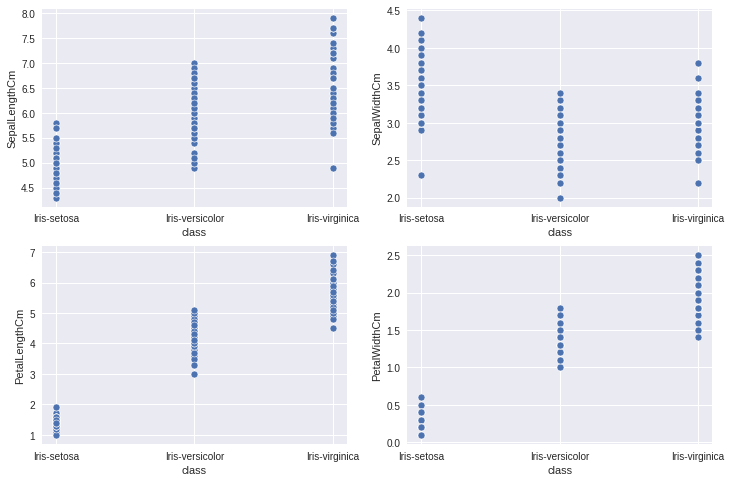

In [5]:
# Graficamos la relación entre los valores que toman los 4 atributos para cada clase posible.
# Estos gráficos de dispersión (scatter plots) nos permiten detectar el siguiente patrón: la clase Iris-setosa se puede separar linealmente de las otras dos clases
# Lo anterior se lograría a través de dos de sus atributos: el largo y ancho del pétalo (PetalLengthCm y PetalWidthCm).
# Lo anterior se va a reflejar en el árbol de decisión, teniendo un nodo hoja para Iris-setosa a muy poca profundidad. 
# De la misma manera, la red neuronal más simple va a poder separar los ejemplos de Iris-setosa de los ejemplos de las otras clases.
# Por su parte, las clases Iris-versicolor e Iris-virginica son más dificiles de separar, ya que el rango de valores que toman sus atributos se superponen.

fig, ax = plt.subplots(2, 2, figsize=(12, 8))
sns.scatterplot(ax=ax[0,0], data=data, x = 'class', y = 'SepalLengthCm')
sns.scatterplot(ax=ax[0,1], data=data, x = 'class', y = 'SepalWidthCm')
sns.scatterplot(ax=ax[1,0], data=data, x = 'class', y = 'PetalLengthCm')
sns.scatterplot(ax=ax[1,1], data=data, x = 'class', y = 'PetalWidthCm')
plt.show()

Separamos la columna target (class) de las demás del dataset y luego particionamos el conjunto en dos subconjuntos: uno para entrenamiento y otro para test. 

En este caso vamos a usar el conjunto de test como conjunto de validación cuando construyamos una red neuronal, pero podrían ser conjuntos distintos.

In [6]:
# CUIDADO: Esta celda no se puede ejecutar dos veces consecutivas. 
# En caso de ejecutarla y por algún motivo querer hacerlo de nuevo, se debe cargar nuevamente el dataset.

# Separamos la columna que tiene la clase.
y = data.pop('class')
print(y)

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: class, Length: 150, dtype: object


In [7]:
# Dividimos el dataset en dos conjuntos: 75% de los datos se usarán para entrenar y el 25% restante para validar o testear.
# Al hacer esta división, las filas se mezclan, logrando una distribución de ejemplos pareja de acuerdo a su clase.
# El parámetro random_state permite obtener la misma división cada vez que lo ejecutemos.

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size = 0.25, random_state = 10)
print('Shape (filas, columnas): {}'.format(X_train.shape))
print('Shape (filas, columnas): {}'.format(X_test.shape))
print('Shape (filas, columnas): {}'.format(y_train.shape))
print('Shape (filas, columnas): {}'.format(y_test.shape))

Shape (filas, columnas): (112, 4)
Shape (filas, columnas): (38, 4)
Shape (filas, columnas): (112,)
Shape (filas, columnas): (38,)


In [ ]:
# Opcional: descomentar las líneas siguientes para mostrar el formato del conjunto de entrenamiento y de sus etiquetas
# print("X_train:")
# print(X_train)
# print("y_train")
# print(y_train)

# Resolución con Árbol de Decisión

Entrenamos un árbol de decisión. Comenzamos creando un árbol utilizando la clase DecisionTreeClassifier de scikitlearn. 
El método fit nos permite ajustar el árbol a los datos de entrenamiento, pasando los ejemplos de entrenamiento (X_train) y sus etiquetas (y_train) como parámetro.

Luego se obtiene el porcentaje de acierto del árbol en el conjunto de test, que son datos no vistos durante la construcción del árbol.

In [8]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

val_score = model.score(X_test, y_test)
print('Accuracy del Árbol de Decisión en el conjunto de test: {}, equiv. {}%'.format(val_score, round(val_score*100, 2)))

Accuracy del Árbol de Decisión en el conjunto de test: 0.9736842105263158, equiv. 97.37%


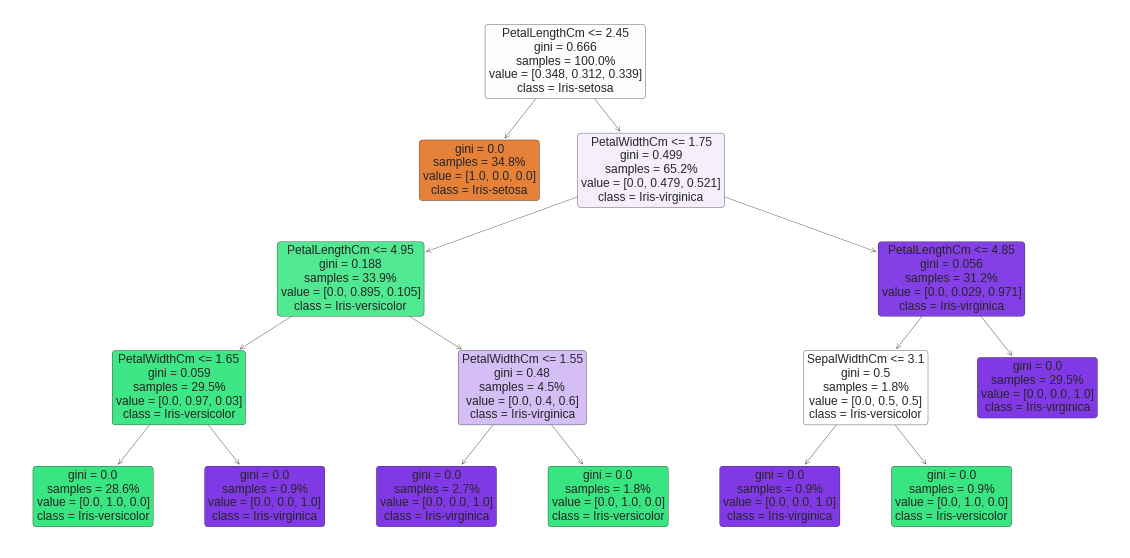

In [9]:
# Mostramos el árbol de decisión. 
# El nodo hoja para Iris-setosa (en naranja) está a profundidad 1, porque se puede diferenciar automáticamente viendo el atributo PetalWidthCm (o PetalLengthCm, depende de la ejecución).
# Las otras clases demandan un proceso más largo.
fig, ax = plt.subplots(figsize=(20, 10))
features = data.columns #nombre de las columnas
classes = model.classes_ #nombre de las clases posibles

# proportion = True muestra el porcentaje de ejemplos de la partición. proportion = False muestra la cantidad de ejemplos.
# filled = True muestra en colores los nodos del árbol.
plot_tree(model, fontsize = 12, proportion=True, filled=True, class_names=classes, feature_names=features, rounded=True)
plt.show()

In [10]:
# Podemos hacer predicciones nuevas, sobre datos no etiquetados, usando el método predict.
# Formato: [sepalLengthCm, sepalWidthCm, petalLengthCm, petalWidthCm] 
nuevo_1 = [5, 2.7, 4.9, 2.1]

prediction = model.predict([nuevo_1])
print(prediction)

['Iris-virginica']


In [ ]:
# Plantear tres nuevos ejemplos y obtener una predicción. Uno para cada clase posible.
# Hint: guiarse con el árbol de la imagen para armar los ejemplos

# nuevo_2 = [,,,]
# nuevo_3 = [,,,]
# nuevo_4 = [,,,]

# prediction = model.predict([nuevo_2, nuevo_3, nuevo_4])
# print(prediction)

In [ ]:
# PARA PRACTICAR: Armar un árbol de decisión siguiendo el algoritmo visto en clase, con 15 ejemplos de este dataset. Para verlos, descomentar lo siguiente y ejecutar esta celda.

# data_aux = pd.read_csv('./iris.csv', delimiter = ',')
# data_aux.drop('Id', axis=1, inplace=True)
# data_aux = data_aux.rename(columns={"Species": "class"})
# data_aux.sample(frac=1, random_state=10).head(15)

# Resolución con Red Neuronal Artificial

En este caso, vamos a crear una estructura de red utilizando Tensorflow y Keras, para luego entrenarla y evaluar su performance en los datos de test, tal como hicimos antes. Vamos a ver que para este problema nos alcanza con una RNA muy simple, de pocos parámetros, que se ajustará casi a la perfección a los ejemplos del dataset.

In [11]:
# CUIDADO: Esta celda no se puede ejecutar dos veces consecutivas. 
# En caso de ejecutarla y por algún motivo querer hacerlo de nuevo, se debe cargar nuevamente el dataset (celda 4) y hacer el split en train/test (celdas 6 y 7)

# Hasta ahora hemos manejado la columna target (class) con cada etiqueta siendo un string.
# Con redes neuronales, necesitamos que la etiqueta de cada ejemplo sea un número, por lo que vamos a hacer esa transformación:
# Iris-virginica se representa con 0, Iris-setosa con 1 y Iris-versicolor con 2.
y_train = [0 if item == 'Iris-virginica' else 1 if item == 'Iris-setosa' else 2 for item in y_train]
y_test = [0 if item == 'Iris-virginica' else 1 if item == 'Iris-setosa' else 2 for item in y_test]
print('Primeros 10 elementos de y_train:\n{}\n'.format(y_train[:10]))

# Ahora vamos a hacer una transformación adicional: en vez de representar las etiquetas con un entero en [0, 2], vamos a codificarlas como
# un vector de tres elementos (esto se denomina one-hot encoding).
# Cuando la etiqueta era un 0, se reemplaza por el vector [1 0 0]; cuando la etiqueta era un 1, se reemplaza con [0 1 0] y 
# cuando la etiqueta era un 2, se reemplaza por [0 0 1]. 
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)
print('Primeros 10 elementos de y_train en one-hot:\n{}'.format(y_train[:10]))

Primeros 10 elementos de y_train:
[0, 0, 1, 1, 2, 1, 2, 1, 2, 2]

Primeros 10 elementos de y_train en one-hot:
[[1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                320       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 99        
Total params: 2,499
Trainable params: 2,499
Non-trainable params: 0
_________________________________________________________________


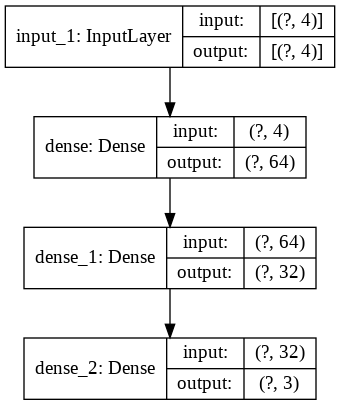

In [12]:
# Construimos la red neuronal
# Definimos el modelo como secuencial, lo que implica que las capas forman una estructura lineal
model = keras.Sequential()
# La primera capa es de entrada. El parámetro shape indica la cantidad de datos de entrada, en este caso son 4 features (las 4 columnas de los datos entrenamiento). 
model.add(keras.Input(shape=(4,)))
# Luego tenemos capas Dense. Todas las salidas de una capa son entrada de la capa siguiente.
# El primer parámetro (64, 32, 3) es la cantidad de neuronas de la capa.
# El parámetro 'activation' es la función que transforma los valores de entrada en valores de salida.
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(32, activation = 'relu'))
model.add(layers.Dense(3, activation = 'softmax'))

# El modelo se compila. Se especifica:
# La función de costo, que se usa para computar el error cometido por la red durante el entrenamiento.
# Optimizador, que el método que se usa para minimizar el error.
# Metricas, función que se usa para medir la performance del entrenamiento.
model.compile(loss='categorical_crossentropy', optimizer= 'adam', metrics = ['accuracy'])

# Mostramos la estructura de la RNA.
model.summary()
tf.keras.utils.plot_model(model, show_shapes=True)

In [14]:
# Entrenamos el modelo.
# Parámetros de fit
# Primeros dos: datos de entrenamiento y etiquetas.
# epochs: cantidad de ciclos.
# verbose: la información que se muestra durante el entrenamiento (0, 1 o 2)
# validation_data: datos de validación.
# batch_size: cantidad de ejemplos que se toman juntos para calcular el error.
print("Entrenamiento:")
history = model.fit(X_train, y_train, epochs = 10, verbose = 1, validation_data= (X_test, y_test), batch_size=8)

# Verificamos el modelo con datos con los que no ha aprendido.
print('\nEvaluación en conjunto de test:')
val_score = model.evaluate(X_test, y_test)
print('Accuracy de la RNA en el conjunto de test: {}, equiv. {}%'.format(val_score[1], round(val_score[1]*100, 2)))

Entrenamiento:
Epoch 1/10
14/14 [==============================] - 0s 5ms/step - loss: 0.2048 - accuracy: 0.9464 - val_loss: 0.2384 - val_accuracy: 0.9737
Epoch 2/10
14/14 [==============================] - 0s 2ms/step - loss: 0.1920 - accuracy: 0.9554 - val_loss: 0.2204 - val_accuracy: 0.9737
Epoch 3/10
14/14 [==============================] - 0s 2ms/step - loss: 0.1834 - accuracy: 0.9821 - val_loss: 0.2135 - val_accuracy: 0.9737
Epoch 4/10
14/14 [==============================] - 0s 2ms/step - loss: 0.1753 - accuracy: 0.9732 - val_loss: 0.1986 - val_accuracy: 0.9737
Epoch 5/10
14/14 [==============================] - 0s 2ms/step - loss: 0.1684 - accuracy: 0.9732 - val_loss: 0.2081 - val_accuracy: 0.9737
Epoch 6/10
14/14 [==============================] - 0s 2ms/step - loss: 0.1695 - accuracy: 0.9375 - val_loss: 0.1826 - val_accuracy: 0.9474
Epoch 7/10
14/14 [==============================] - 0s 3ms/step - loss: 0.1676 - accuracy: 0.9643 - val_loss: 0.1741 - val_accuracy: 0.9737
Epoch

Para terminar, lo que vamos a hacer es predecir todos los ejemplos que tenemos en el conjunto de test (para los que sabemos que la red acierta en el porcentaje visto arriba), comparar las predicciones con las etiquetas reales y ver para qué clase se produce la mayor cantidad de errores.


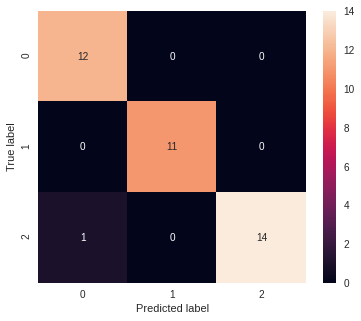

In [15]:
# El método predict nos permite pasar un conjunto de ejemplos y obtener predicciones para cada uno, en un formato de 3 probabilidad.
# Podés descomentar los print que siguen para ver la salida para los 10 primeros elementos.
# Una predicción es una tripla [a, b, c] donde a es la probalidad de que el ejemplo sea de la clase iris-virginica; b es la probabilidad de que
# el ejemplo sea de la clase iris-setosa y c de que el ejemplo pertenezca a la clase iris-versicolor

y_pred = model.predict(X_test)
# print(y_pred[:10])
y_pred = np.around(y_pred)
# print(y_pred[:10])

# La matriz de confusión nos pone en el eje Y las etiquetas reales y en el X las predichas por el modelo.
# Los números de la diagonal son aciertos, pues la red neuronal determina que esos ejemplos son de la clase correcta, 
# mientras que los números fuera de la diagonal son ejemplos en lo que ha fallado.
# En muchos casos, este tipo de matriz nos da información valiosa para mejorar la RNA.

cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
# Ejercicio: copiar los ejemplos que pensaron para el árbol de decisión y probarlos con la RNA.
# También pueden imprimir y_pred para ver la salida real de la RNA

# nuevo_2 = [,,,]
# nuevo_3 = [,,,]
# nuevo_4 = [,,,]

# y_pred = model.predict([nuevo_2, nuevo_3, nuevo_4])
# prediction = np.around(y_pred)
# print(prediction)